**Precision agriculture** is a modern farming technique that uses research data of soil characteristics, soil types, crop yield data collection and suggests the farmers the right crop based on their site-specific parameters. This reduces the wrong choice when it comes to crop selection, and also increases productivity.

We will build a **Machine Learning model** to predict the most suitable
crop to grow on a particular farm.


In [2]:
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")

In [4]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,apple
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,chickpea
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,jute
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,coffee
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,chickpea


In [5]:
train_data['crop'].nunique()

22

In [6]:
train_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1645    False
1646    False
1647    False
1648    False
1649    False
Length: 1650, dtype: bool

In [7]:
train_data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [8]:
train_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,50.370308,53.419241,48.111081,25.647214,71.563115,6.485583,103.965778
std,36.743966,33.320501,50.537044,5.005005,22.198130,0.765865,55.510324
min,0.000000,5.000000,5.000000,9.467960,14.273280,3.525366,20.360011
25%,21.000000,27.000000,20.552276,22.807269,60.120113,5.986160,65.025621
50%,37.000000,52.000000,31.575398,25.656980,80.547206,6.426118,95.246217
75%,84.738202,68.000000,49.000000,28.529953,90.003702,6.924943,127.887636
max,136.000000,145.000000,205.000000,42.936054,99.981876,9.935091,298.560117


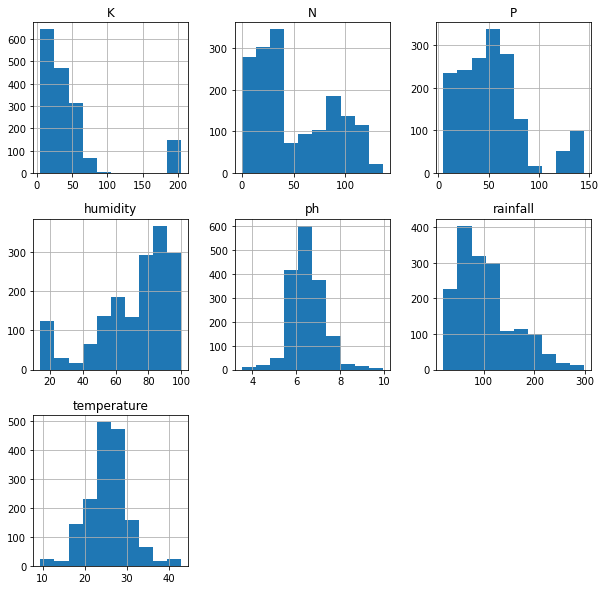

In [9]:
train_data.hist(bins=10,figsize=(10,10))
plt.show()

In [10]:
train_data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.232892,-0.143022,0.014088,0.185919,0.080087,0.049705
P,-0.232892,1.000000,0.735456,-0.133283,-0.119861,-0.145958,-0.064344
K,-0.143022,0.735456,1.000000,-0.162041,0.188512,-0.193294,-0.054222
temperature,0.014088,-0.133283,-0.162041,1.000000,0.201797,-0.018037,0.000306
humidity,0.185919,-0.119861,0.188512,0.201797,1.000000,-0.011764,0.105829
ph,0.080087,-0.145958,-0.193294,-0.018037,-0.011764,1.000000,-0.138397
rainfall,0.049705,-0.064344,-0.054222,0.000306,0.105829,-0.138397,1.000000


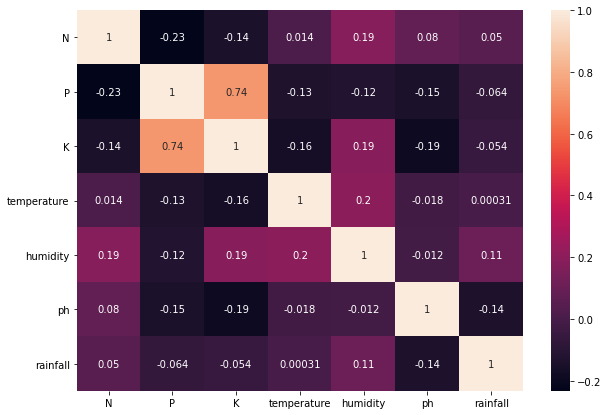

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

<Figure size 720x576 with 0 Axes>

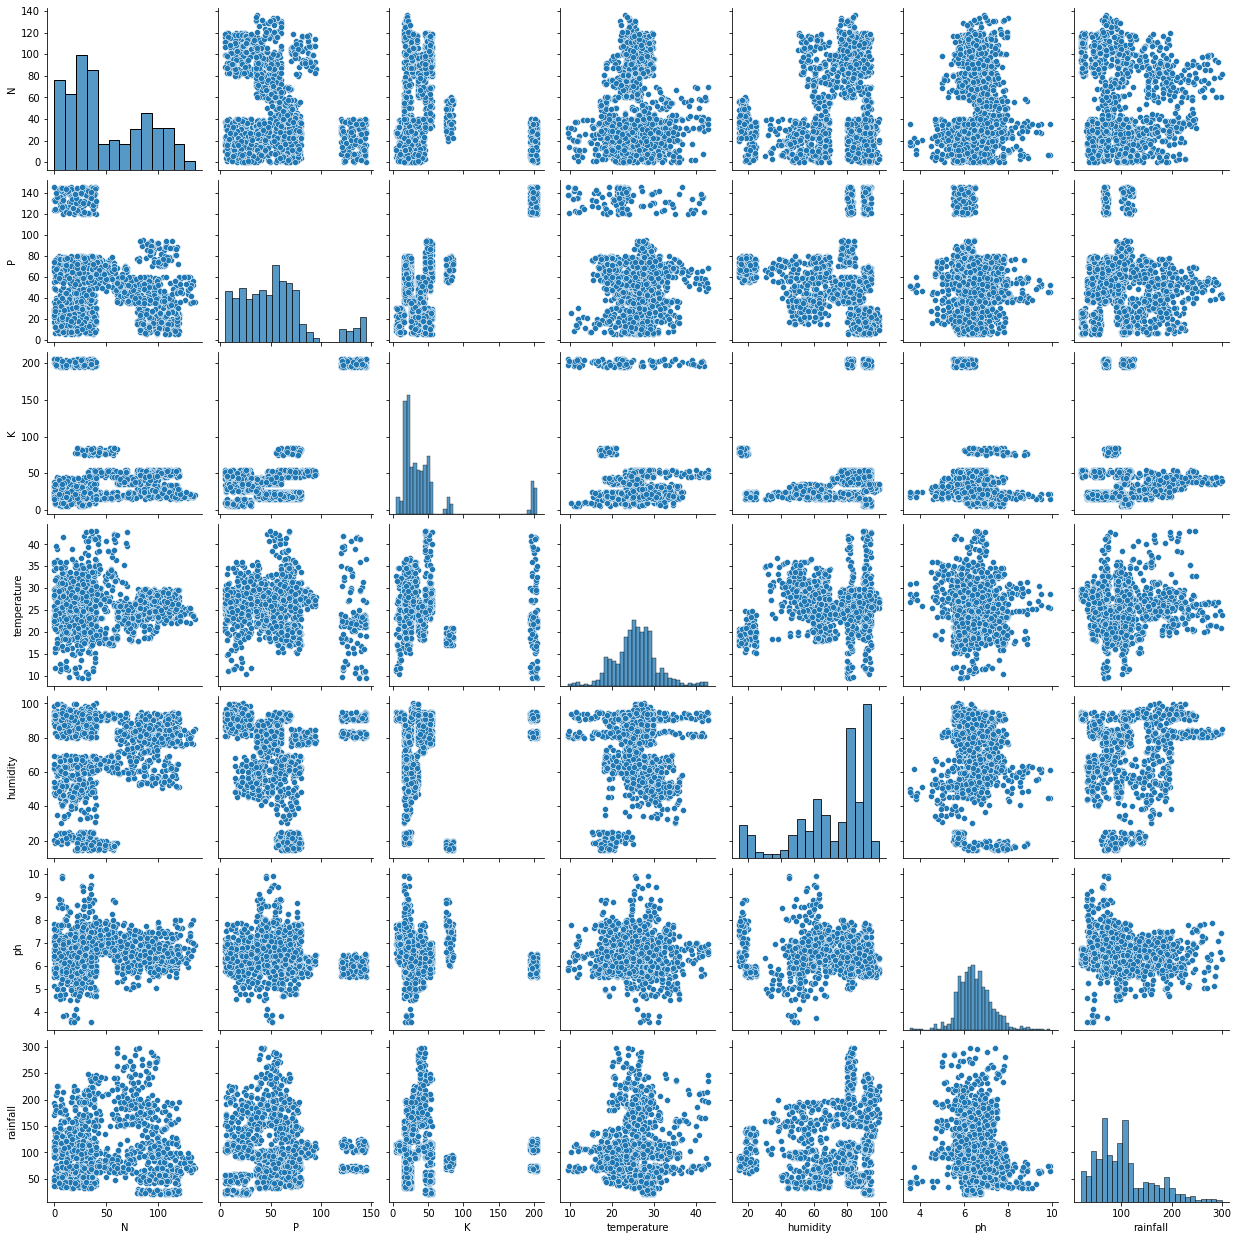

In [12]:
plt.figure(figsize=(10,8))
sns.pairplot(train_data)
plt.show()

c:\users\shubham jha\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


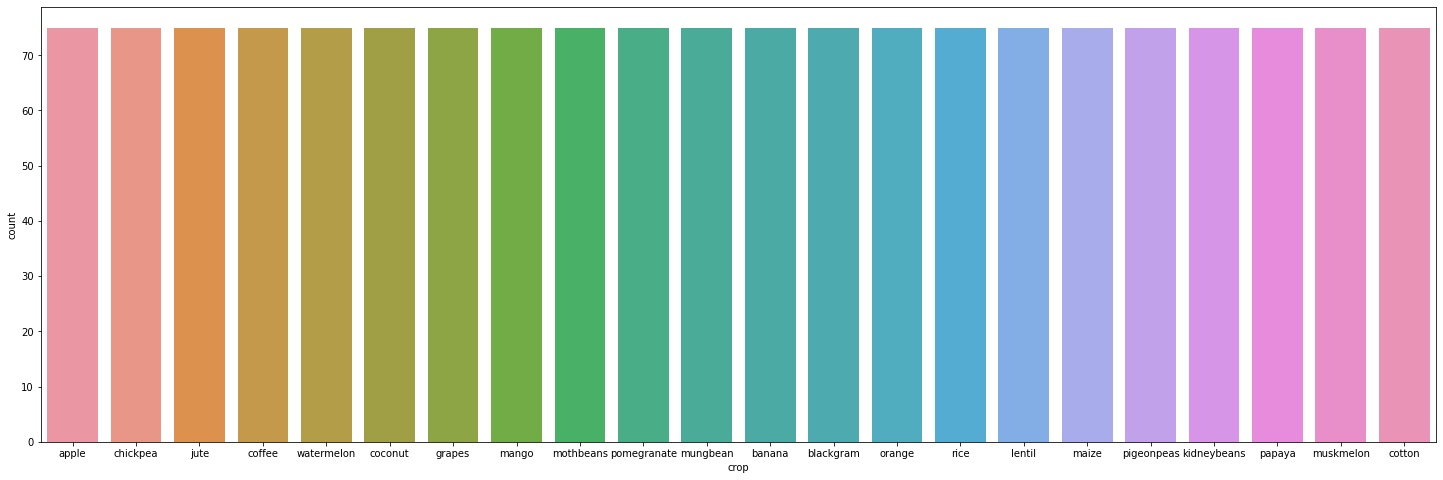

In [13]:
plt.figure(figsize=(25,8))
sns.countplot(train_data.crop)
plt.show()

In [14]:
le = LabelEncoder()
train_data.crop = le.fit_transform(train_data.crop)

In [15]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,0
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,3
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,8
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,5
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,3


In [16]:
X = train_data.drop('crop', axis = 1)
y = train_data['crop'] 

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=150)

In [20]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
pred = model.predict(X_val)

In [22]:
from sklearn.metrics import accuracy_score

In [25]:
print('Accuracy Score is: ', accuracy_score(y_val, pred)) 

Accuracy Score is:  0.9919191919191919


In [26]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            550 non-null    float64
 1   P            550 non-null    float64
 2   K            550 non-null    float64
 3   temperature  550 non-null    float64
 4   humidity     550 non-null    float64
 5   ph           550 non-null    float64
 6   rainfall     550 non-null    float64
dtypes: float64(7)
memory usage: 30.1 KB


In [28]:
test_data.shape

(550, 7)

In [29]:
test_data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [30]:
target = model.predict(test_data)
target

array([13,  6, 12, 10, 14,  5, 10,  6, 10, 10,  8, 13, 16,  1,  4, 15,  7,
        5, 21, 14,  4, 20, 13, 11,  0, 16, 20, 21, 19, 13,  9, 14,  1, 17,
        2,  3,  9,  4, 10, 17,  7,  7, 20,  3,  7, 18, 21, 18, 21, 12, 11,
       12,  7, 18, 20,  9,  0,  4, 21,  0, 14,  5, 21, 14,  0,  9, 16,  7,
       21,  4, 11, 19,  6,  0, 11,  8, 13,  6,  6, 18, 18, 13,  1,  0,  9,
        6,  1,  3,  0, 11,  7, 16, 19,  2, 21, 13,  7,  0,  3, 16, 16, 15,
        4,  8, 16,  6, 18,  6,  6, 12, 19,  3, 11, 13,  5,  9,  1,  4, 10,
        8,  2,  5,  9, 14,  6, 17, 21,  4, 17,  2, 20, 13, 15, 13, 20, 14,
       19, 18,  5,  5, 12,  8,  8,  6,  3,  3, 17, 13, 16,  0,  5, 14, 11,
        3,  2, 10, 16,  9, 19, 17,  2, 12, 19,  8, 18, 13,  3, 15,  3, 10,
       12,  4,  1,  5, 20, 12, 21, 21,  8,  4, 18, 17, 20, 16,  6,  2, 18,
       12, 12,  2,  8, 16, 17, 11, 11,  6, 17, 15,  0,  5,  4, 21, 15, 15,
        4,  3, 11, 14,  6, 15, 13, 20, 10, 20,  9,  7, 18, 10,  8,  7, 11,
       11, 15, 12, 14,  1

In [31]:
target = le.inverse_transform(target)
target

array(['mothbeans', 'cotton', 'mango', 'lentil', 'mungbean', 'coffee',
       'lentil', 'cotton', 'lentil', 'lentil', 'jute', 'mothbeans',
       'orange', 'banana', 'coconut', 'muskmelon', 'grapes', 'coffee',
       'watermelon', 'mungbean', 'coconut', 'rice', 'mothbeans', 'maize',
       'apple', 'orange', 'rice', 'watermelon', 'pomegranate',
       'mothbeans', 'kidneybeans', 'mungbean', 'banana', 'papaya',
       'blackgram', 'chickpea', 'kidneybeans', 'coconut', 'lentil',
       'papaya', 'grapes', 'grapes', 'rice', 'chickpea', 'grapes',
       'pigeonpeas', 'watermelon', 'pigeonpeas', 'watermelon', 'mango',
       'maize', 'mango', 'grapes', 'pigeonpeas', 'rice', 'kidneybeans',
       'apple', 'coconut', 'watermelon', 'apple', 'mungbean', 'coffee',
       'watermelon', 'mungbean', 'apple', 'kidneybeans', 'orange',
       'grapes', 'watermelon', 'coconut', 'maize', 'pomegranate',
       'cotton', 'apple', 'maize', 'jute', 'mothbeans', 'cotton',
       'cotton', 'pigeonpeas', 'pige

In [32]:
res = pd.DataFrame(target) 
res.columns = ["prediction"]

from google.colab import files
res.to_csv('submission.csv', index = False)         
files.download('submission.csv')

ModuleNotFoundError: No module named 'google.colab'